In [48]:
import cv2

participant_number = '3'
video_path = f"./data/Videos/P{participant_number}.avi"


cap = cv2.VideoCapture(video_path)

In [49]:
from models.frame import Frame
from typing import List

frames: List[Frame] = []
cap = cv2.VideoCapture(video_path)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(Frame(len(frames), participant_number, frame))
cap.release()

In [50]:
%load_ext autoreload
%autoreload 2
from utils.face_analyzer import FaceAnalyzer
import random

face_analyzer = FaceAnalyzer()
frames_selection = random.sample(frames, 20)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Face

In [ ]:
for frame in frames_selection:
    frame.face = face_analyzer.get_face(frame.image)

(np.int32(218), np.int32(79), np.int32(122), np.int32(122))
(np.int32(174), np.int32(100), np.int32(119), np.int32(119))
(np.int32(191), np.int32(79), np.int32(128), np.int32(128))
(np.int32(186), np.int32(77), np.int32(118), np.int32(118))
None
(np.int32(168), np.int32(85), np.int32(121), np.int32(121))
(np.int32(180), np.int32(75), np.int32(116), np.int32(116))
(np.int32(187), np.int32(115), np.int32(99), np.int32(99))
(np.int32(181), np.int32(116), np.int32(108), np.int32(108))
(np.int32(168), np.int32(78), np.int32(113), np.int32(113))
(np.int32(207), np.int32(35), np.int32(150), np.int32(150))
(np.int32(187), np.int32(68), np.int32(120), np.int32(120))
(np.int32(170), np.int32(58), np.int32(127), np.int32(127))
(np.int32(170), np.int32(66), np.int32(123), np.int32(123))
(np.int32(190), np.int32(51), np.int32(107), np.int32(107))
(np.int32(198), np.int32(126), np.int32(116), np.int32(116))
None
(np.int32(179), np.int32(134), np.int32(91), np.int32(91))
(np.int32(179), np.int32(84),

# Smile

In [58]:
for frame in frames_selection:
    frame.smile = face_analyzer.get_smile(frame.image, frame.face) if frame.face is not None else None

# Facial Interest Points

In [59]:
for frame in frames_selection:
    frame.face_interest_points = face_analyzer.get_face_interest_points(frame)

# Selected Facial Features

In [60]:
for frame in frames_selection:
    if frame.face_interest_points:
        frame.selected_facial_landmarks = face_analyzer.get_selected_facial_features(frame.face_interest_points)

# Display Frames

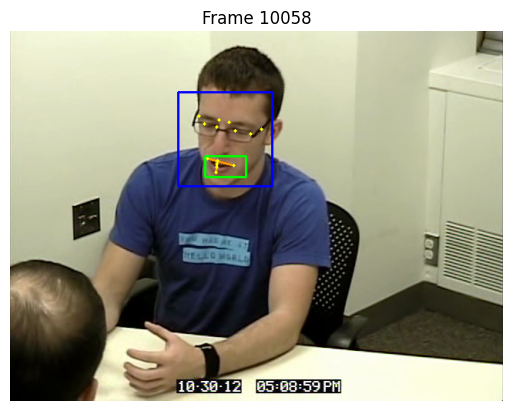

(np.int32(253), np.int32(162), np.int32(53), np.int32(27))
(np.int32(218), np.int32(79), np.int32(122), np.int32(122))


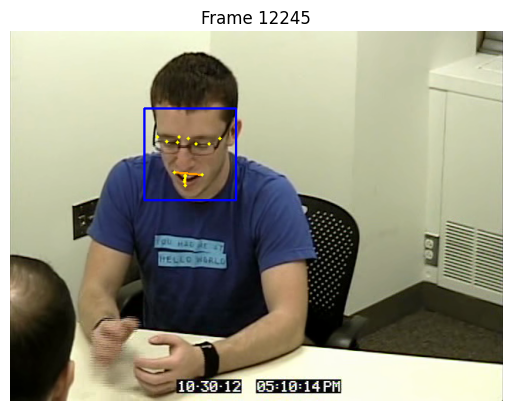

None
(np.int32(174), np.int32(100), np.int32(119), np.int32(119))


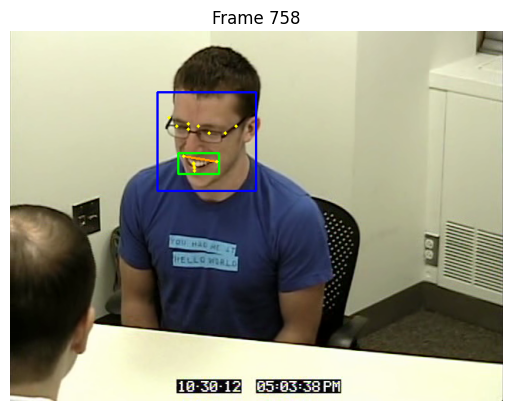

(np.int32(218), np.int32(158), np.int32(53), np.int32(27))
(np.int32(191), np.int32(79), np.int32(128), np.int32(128))


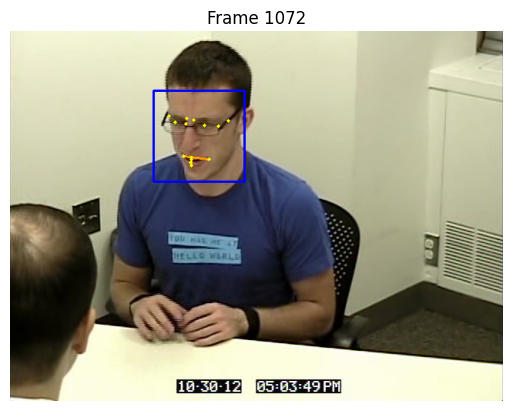

None
(np.int32(186), np.int32(77), np.int32(118), np.int32(118))


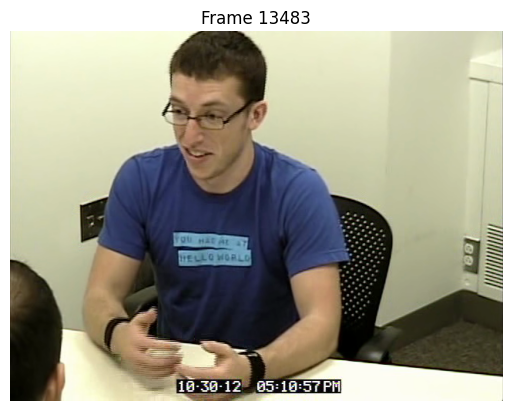

None
None


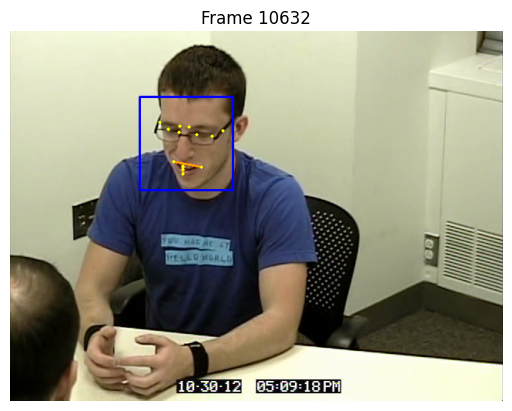

None
(np.int32(168), np.int32(85), np.int32(121), np.int32(121))


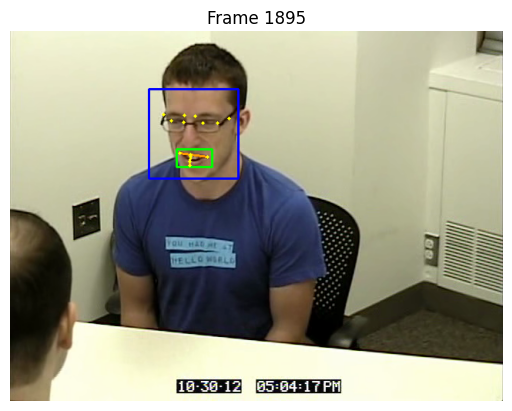

(np.int32(216), np.int32(153), np.int32(46), np.int32(23))
(np.int32(180), np.int32(75), np.int32(116), np.int32(116))


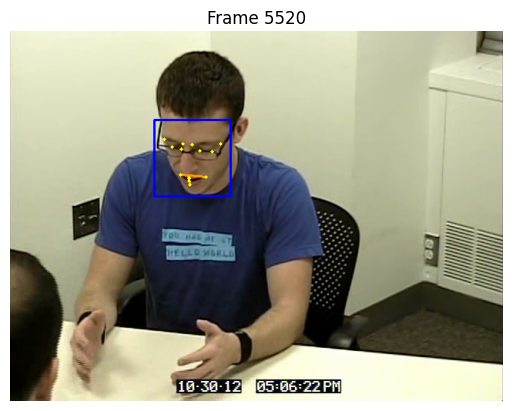

None
(np.int32(187), np.int32(115), np.int32(99), np.int32(99))


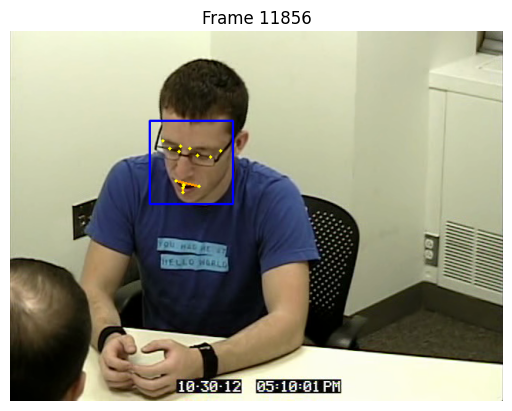

None
(np.int32(181), np.int32(116), np.int32(108), np.int32(108))


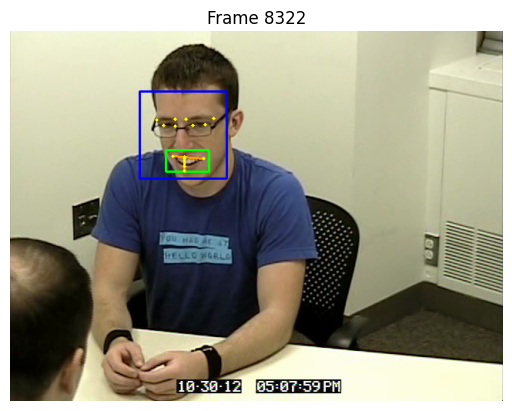

(np.int32(202), np.int32(154), np.int32(56), np.int32(28))
(np.int32(168), np.int32(78), np.int32(113), np.int32(113))


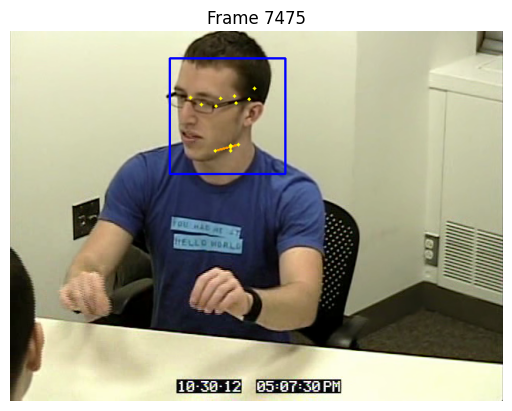

None
(np.int32(207), np.int32(35), np.int32(150), np.int32(150))


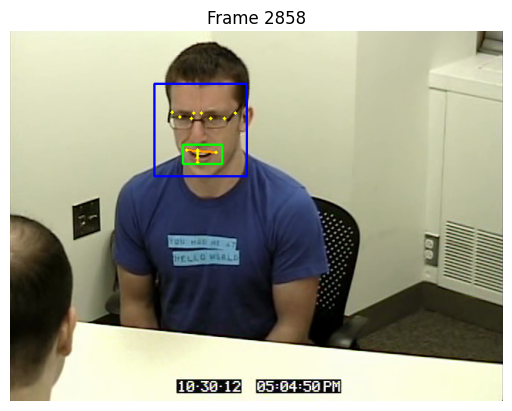

(np.int32(224), np.int32(147), np.int32(51), np.int32(25))
(np.int32(187), np.int32(68), np.int32(120), np.int32(120))


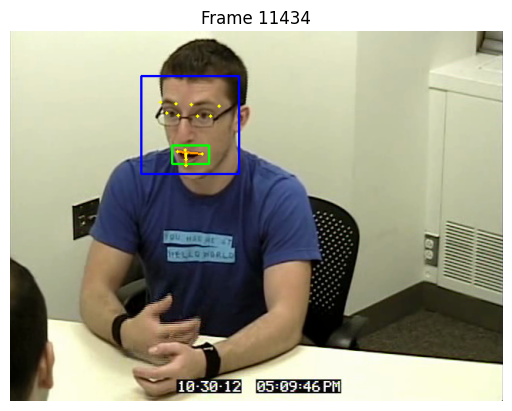

(np.int32(210), np.int32(148), np.int32(48), np.int32(24))
(np.int32(170), np.int32(58), np.int32(127), np.int32(127))


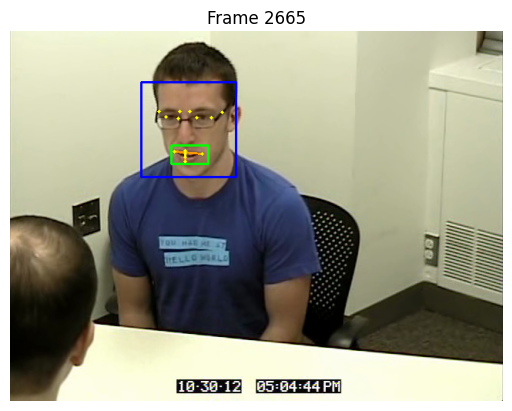

(np.int32(209), np.int32(148), np.int32(48), np.int32(24))
(np.int32(170), np.int32(66), np.int32(123), np.int32(123))


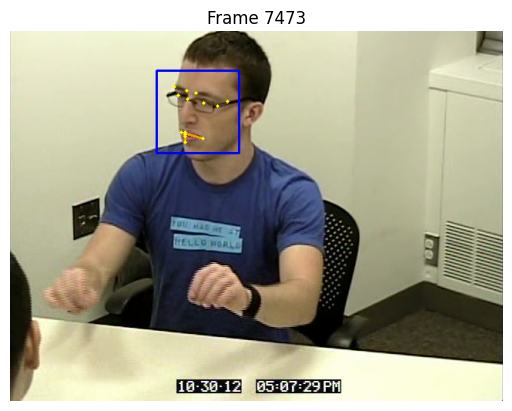

None
(np.int32(190), np.int32(51), np.int32(107), np.int32(107))


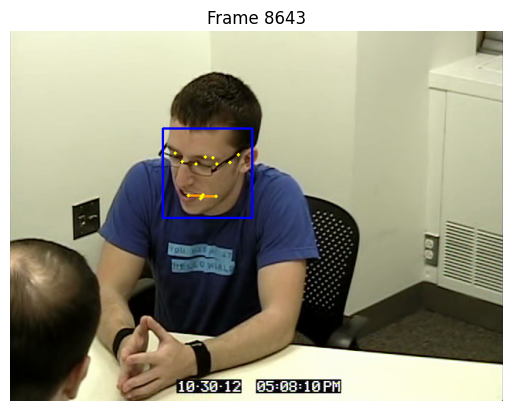

None
(np.int32(198), np.int32(126), np.int32(116), np.int32(116))


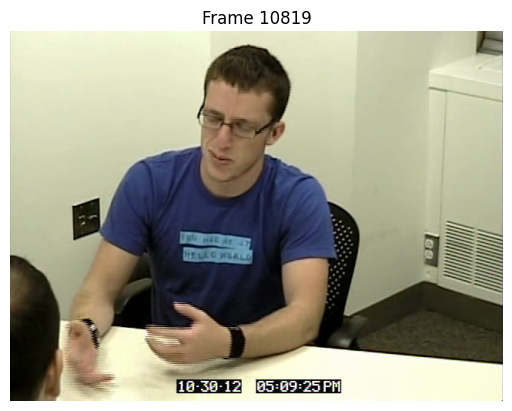

None
None


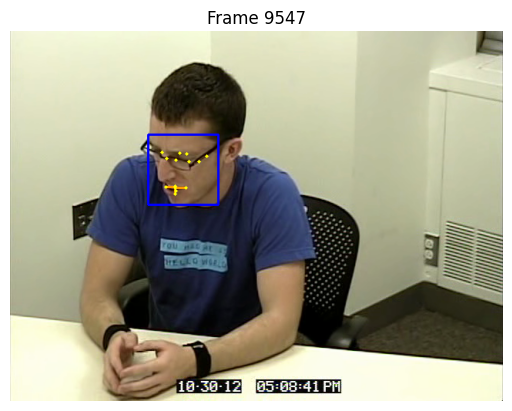

None
(np.int32(179), np.int32(134), np.int32(91), np.int32(91))


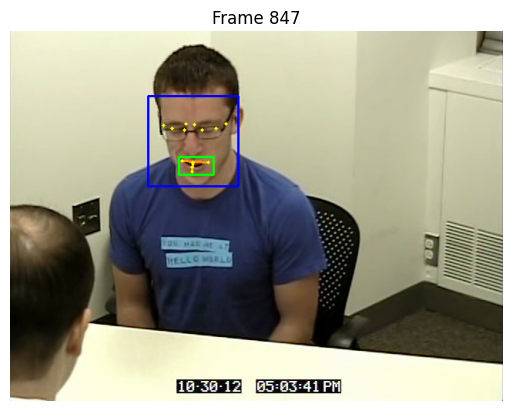

(np.int32(219), np.int32(163), np.int32(45), np.int32(23))
(np.int32(179), np.int32(84), np.int32(117), np.int32(117))


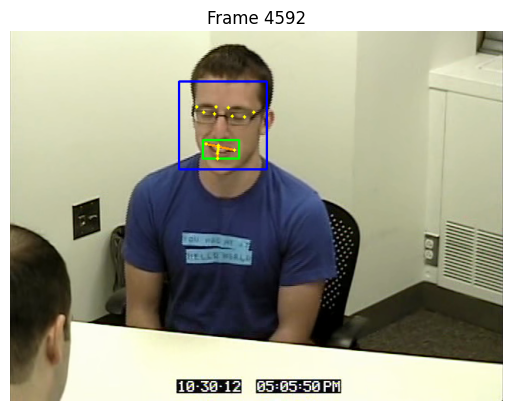

(np.int32(250), np.int32(141), np.int32(47), np.int32(24))
(np.int32(219), np.int32(65), np.int32(114), np.int32(114))


In [ ]:
for frame in frames_selection:
    frame.create_drawable_image_copy()
    frame.draw_face()
    frame.draw_smile()
    # frame.draw_facial_landmarks()
    frame.draw_selected_facial_landmarks()
    frame.display()